<a href="https://colab.research.google.com/github/srimanthtenneti/Deep_Learning_Workshop_Sept2021/blob/main/Day5Lab_CNNHelloWorld.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Deep Learning

### Introduction
IEEE (Institute of Electrical and Electronics Engineering) is the world's largest organisation which is dedicated for the benifit of technological development. IEEE has highly cited publications, conferences, technology standards, and professional and educational activities. 
Technolites is a club of CVRCoE which is devoted for various technical events. Here students get highly inspired and share their ideas to derive some exceptionally innovative projects and technical event.
For the first time in collaboration with IEEE CVECoE and Technolites CVRCoE we are presenting to you a 6-days workshop on Deep Learning.



### About the Notebook

* Author : Srimanth Tenneti
* Date   : 23/09/2021
* Version : 1.0
* Description : Day-5 Hands on Lab Notebook
* Topic : Convolutional Neural Networks using PyTorch
* Prerequisites  
                  1. Python 
                  2. Percpetron Theory
                  3. Designing Neural Networks using PyTorch API
                  4. Image Processing Basics
                  5. Convolution Theory

### Instructions

* The notebook contains some Fixme segments. The code will only work if they are filled with the appropriate code.

* Follow the instructions during the Live Session to complete the code. 

* In case you face any issues kindly contact the Training Assistants in the live session or contact the IEEE CVRCE members via the Discord Community.


### Importing required Libraries

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as f
import torch.optim as optim

import torchvision
import torchvision.datasets 
import numpy as np
import matplotlib.pyplot as plt 

### Downloading the dataset

In [7]:
transforms = Fixme # Apply a data transform
trainset = Fixme # Download the training dataset
testset  = Fixme # Download the test dataset

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./root/MNIST/raw/train-images-idx3-ubyte.gz to ./root/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./root/MNIST/raw/train-labels-idx1-ubyte.gz to ./root/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./root/MNIST/raw/t10k-images-idx3-ubyte.gz to ./root/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./root/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./root/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [87]:
batch_size = Fixme # Define batch size
trainloader = Fixme # Create train data loader
testloader  = Fixme # Create test data loader

### Visualizing the data

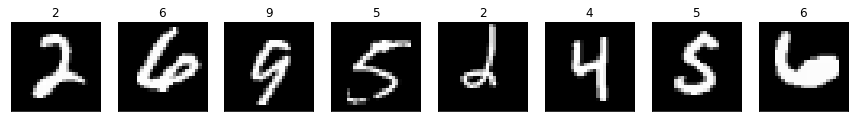

In [22]:
images, labels = iter(trainloader).next()
images, labels = images.numpy() , labels.numpy()

fig = plt.figure(figsize = (15,5))

for i in range(batch_size):
  ax = fig.add_subplot(1 , batch_size , i + 1 , xticks = [] , yticks = [])
  ax.imshow(np.squeeze(images[i]) , cmap = 'gray')
  ax.set_title(labels[i])

### Note
In order to create a CNN we clearly need to know the image dimensions and the dimensions need to be fixed for all the images. 

In [23]:
images[0].shape

(1, 28, 28)

### Looking at all the classes in the dataset

In [25]:
trainset.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

### Le-Net 5
\begin{equation}
   O/p  = \frac{Image size - Kernel size + 2 * Padding}{stride} + 1
\end{equation}

In [63]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet , self).__init__()
    Fixme # Define the LeNet 5 architecture
  def forward(self , x):
    Fixme # Define the forward pass
    return x

### Model instantiation

In [64]:
model = Fixme #Instantiate the LeNet model

def test_untrained(idx):
  print("Prediction of untrained model is : {}, the ground truth is {}".format(torch.argmax(model(torch.unsqueeze(torch.Tensor(images[idx]) , dim = 1))), labels[idx]))

### Test the Untrained model

In [65]:
test_untrained(3)

Prediction of untrained model is : 3, the ground truth is 5


### Define model hyperparameters

In [66]:
n_epochs = 3
lr = 0.01

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters() , lr = lr)

### Define the training loop

In [67]:
losses = []
for i in range(n_epochs):
  trainloss = 0.0
  Fixme # Complete the training loop

Epoch : 1 , Training Loss : 0.07756254076957703
Epoch : 3 , Training Loss : 0.07587889581918716
Training Completed !!!


### Loss plot

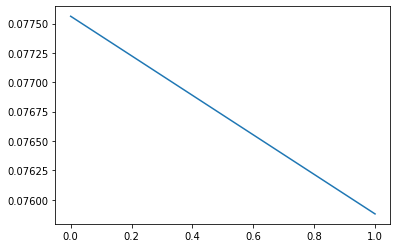

In [68]:
plt.plot(losses)

### Inference

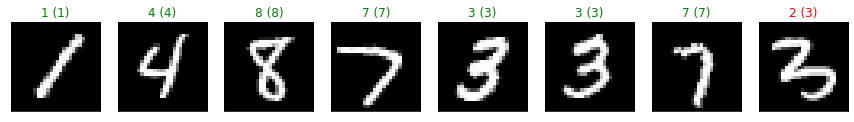

In [92]:
images, labels = iter(testloader).next()

fig = plt.figure(figsize = (15,5))

for i in range(batch_size):
  ax = fig.add_subplot(1 , batch_size , i + 1 , xticks = [] , yticks = [])
  ax.imshow(np.squeeze(images[i]) , cmap = 'gray')
  label_pred = torch.argmax(model(torch.unsqueeze(torch.Tensor(images[i]) , dim = 1))).item()
  ax.set_title("{} ({})".format(label_pred, labels[i]),
                 color=("green" if label_pred==labels[i] else "red"))